ImageDataGenerator() is now deprecated, we need to use image_dataset_from_directory()

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

https://www.tensorflow.org/tutorials/load_data/images?hl=fr

https://www.tensorflow.org/tutorials/images/data_augmentation?hl=fr

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
print("version de TensorFlow importée :", tf.__version__)

version de TensorFlow importée : 2.16.1


In [37]:
# Définir les dossiers source et destination
data_dir = pathlib.Path('D:/LAYER0/MO/MO/')
augmented_dir = pathlib.Path('D:/LAYER1/MO/')

In [38]:
# Create the destination directory if it does not exist
if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)

Voici l'un des 2438 fichiers chargés, il est très appétissant :


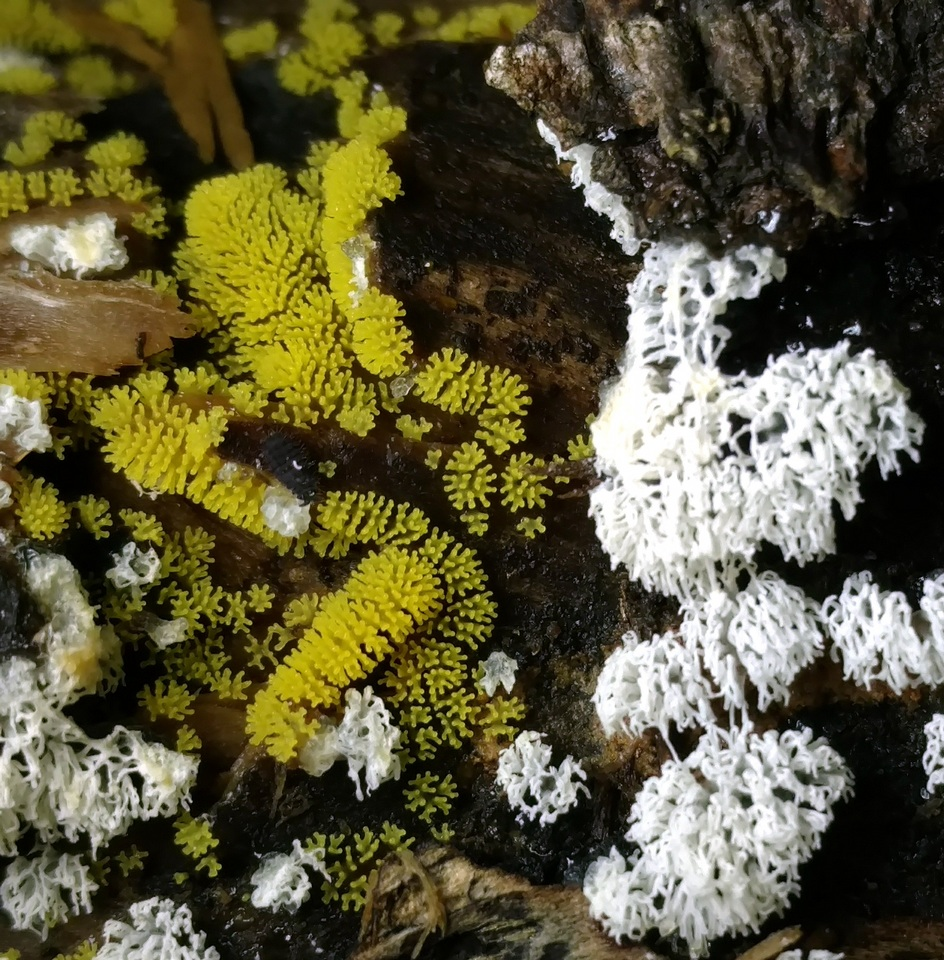

In [39]:
print("Voici l'un des", len(list(data_dir.glob('*/*.jpg'))), "fichiers chargés, il est très appétissant :")
champi = list(data_dir.glob('*/*.jpg'))
PIL.Image.open(str(champi[1]))

# Augmentation des data

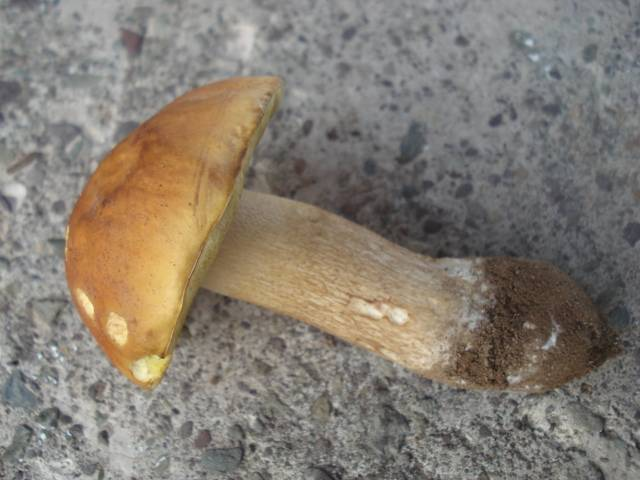

In [40]:
# Pour la suite, nous allons appliquer les tests sur le champi N°1000 choisi arbitrairement.
champi_test_path = str(champi[1000])

PIL.Image.open(champi_test_path)

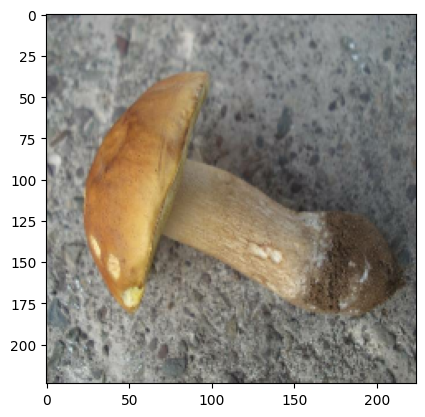

In [41]:
# Décodage de l'image JPEG en tant qu'image tensor
image = tf.image.decode_jpeg(tf.io.read_file(champi_test_path), channels=3)  # channels=3 pour une image couleur (RGB)

# Redimensionnement et mise à l'échelle
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(224, 224),  # Taille de l'image
  layers.Rescaling(1./255)
])

image = resize_and_rescale(image)
plt.imshow(image)

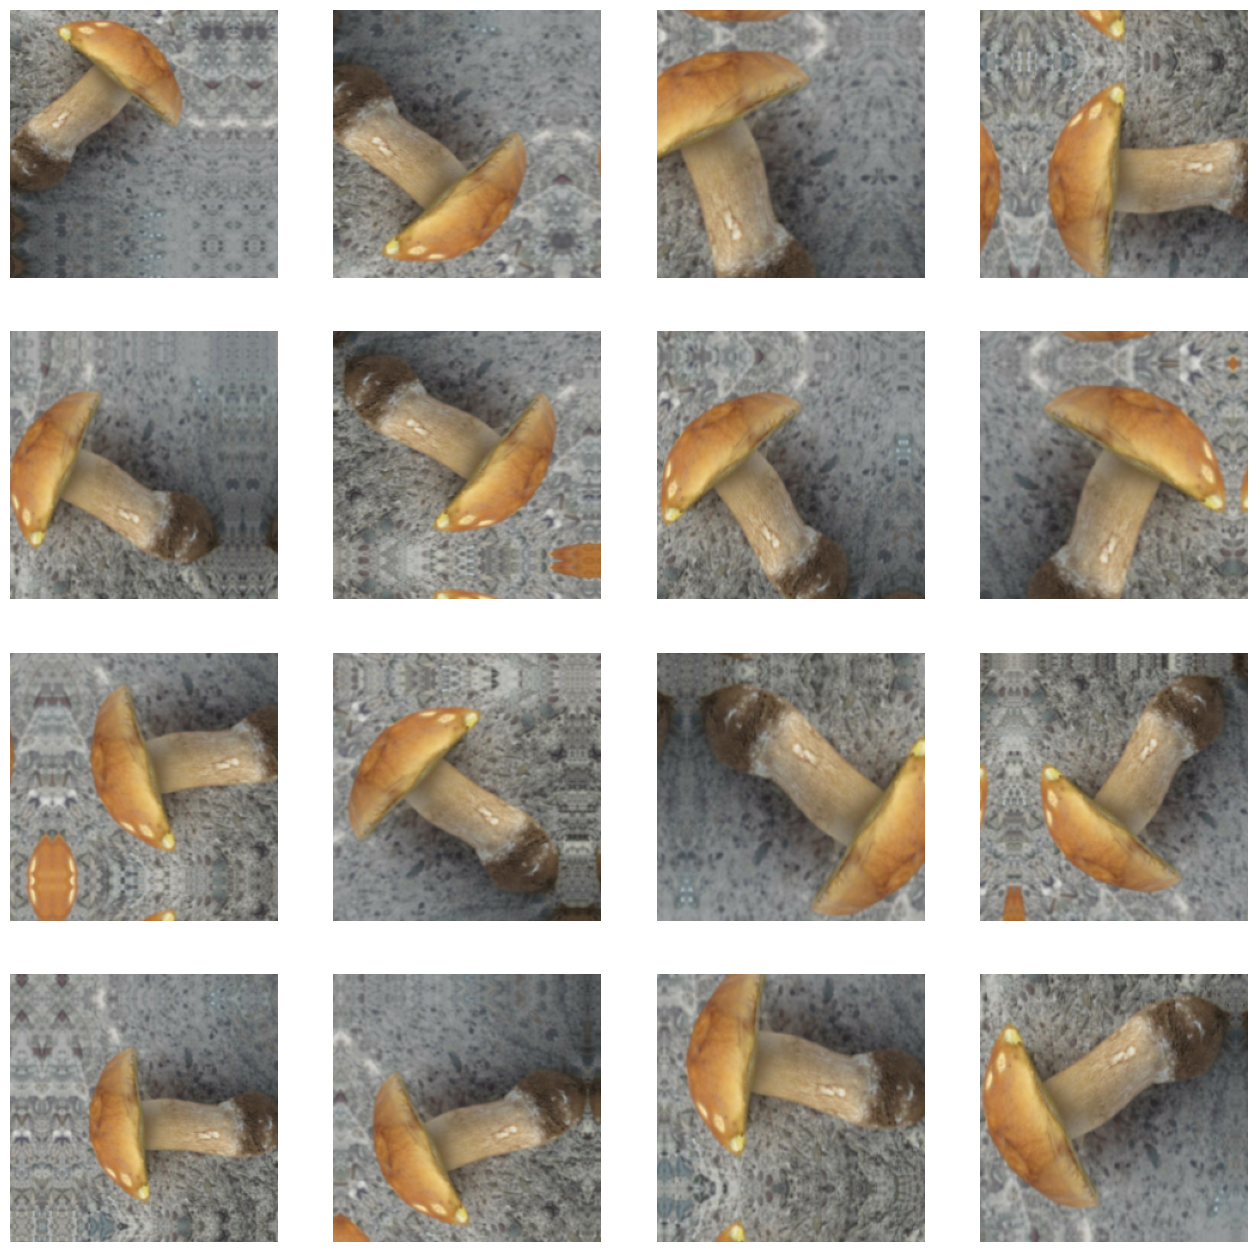

In [101]:
# Décodage de l'image JPEG en tant qu'image tensor
image = tf.image.decode_jpeg(tf.io.read_file(champi_test_path), channels=3)  # channels=3 pour une image couleur (RGB)

data_augmentation = tf.keras.Sequential([ # Nous reprenons l'étape précédente dans les layers
  layers.Resizing(224, 224), # Resize
  layers.Rescaling(1./255),  # Scale
  layers.RandomFlip("horizontal_and_vertical"), # Flip
  layers.RandomRotation(0.2), # Rotation
  layers.RandomZoom((-0.2, 0.2)), # Zoom
  layers.RandomTranslation(0.2, 0.2) # Translation
])

# Ajouter l'image dans un batch
image = tf.expand_dims(image, 0)

# Nous générons ici 16 images augmentées
plt.figure(figsize=(16, 16))
for i in range(16):
  # Générer l'image augmentée
  augmented_image = data_augmentation(image)

  # Enregistrer l'image au format JPEG
  augmented_image_conv = tf.image.convert_image_dtype(augmented_image, tf.uint8) # Convertion
  augmented_image_enc = tf.image.encode_jpeg(augmented_image_conv[0]) # Encodage JPEG
  fname = str(i)+"_augmented_image.jpg" # Nommage
  with open(fname, 'wb') as f: f.write(augmented_image_enc.numpy()) # Écriture

  # Afficher dans le notebook
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

Liste des layers disponibles :

https://www.tensorflow.org/api_docs/python/tf/keras/layers/